In [1]:
#Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
data = pd.read_csv('D:/Annaconda/data/kelulusan_siswa.csv')
data

,Nama,NIS,Kelas,NRR B.Ind,NRR Agama,NRR PPKn,NRR Matematika,NRR Sejarah,NRR Bahasa Inggris,NRR Seni Budaya,...,USEK Matematika,USEK Sejarah,USEK B.Ing,USEK Senbud,USEK Penjaskes,USEK Prakarya,USEK Geografi,USEK Sosiologi,USEK Ekonomi,Status
0,ADITYA NUGRAHA,16676,IPS 1,83,83,84,82,78,83,84,...,74,84,87,82,88,82,87,86,88,T
1,AL-FATH RAMADHAN,16644,IPS 1,82,85,83,83,83,86,85,...,88,89,89,88,90,88,88,90,84,L
2,ALKI EL RIDHO,16645,IPS 1,83,84,81,82,78,84,85,...,83,83,90,84,87,84,90,85,85,L
3,ANNISA AULIA SABRINA,16679,IPS 1,89,85,85,84,82,87,82,...,83,88,73,85,85,87,74,85,73,T
4,CICI JUANDA PUTRI,16683,IPS 1,83,85,80,82,78,86,82,...,82,85,85,89,86,88,82,84,85,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,A,16622,IPS 5,86,83,86,87,85,82,90,...,76,75,76,88,77,81,84,78,86,L
155,A,16670,IPS 5,85,79,90,78,83,89,80,...,76,90,82,86,90,85,82,79,89,L
156,A,16642,IPS 5,78,78,82,86,85,89,80,...,85,88,76,81,74,74,82,77,77,T
157,A,17435,IPS 5,80,86,82,85,83,89,85,...,76,81,77,77,75,82,90,87,81,L


In [8]:
data.describe()

,NIS,NRR B.Ind,NRR Agama,NRR PPKn,NRR Matematika,NRR Sejarah,NRR Bahasa Inggris,NRR Seni Budaya,NRR Penjaskes,NRR Prakarya,...,USEK PPKn,USEK Matematika,USEK Sejarah,USEK B.Ing,USEK Senbud,USEK Penjaskes,USEK Prakarya,USEK Geografi,USEK Sosiologi,USEK Ekonomi
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,16756.245283,83.679245,84.264151,83.955975,84.201258,83.345912,84.037736,84.691824,84.817610,84.364780,...,83.779874,82.044025,83.672956,83.559748,82.786164,85.716981,82.817610,83.779874,83.968553,83.830189
std,265.033834,3.510059,2.531955,2.749789,2.984729,3.062611,3.225466,2.778648,3.165989,2.566634,...,3.264011,4.405615,4.193873,4.228581,4.085115,4.406744,4.018715,4.215174,4.100666,3.815703
min,16610.000000,72.000000,78.000000,75.000000,75.000000,72.000000,74.000000,78.000000,75.000000,78.000000,...,74.000000,70.000000,70.000000,71.000000,74.000000,74.000000,73.000000,73.000000,71.000000,73.000000
25%,16640.500000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,83.000000,82.000000,82.000000,...,82.000000,79.000000,81.000000,81.000000,80.000000,84.000000,80.000000,81.000000,82.000000,82.000000
50%,16671.000000,84.000000,84.000000,84.000000,84.000000,83.000000,84.000000,85.000000,85.000000,85.000000,...,84.000000,82.000000,84.000000,84.000000,83.000000,87.000000,84.000000,84.000000,85.000000,84.000000
75%,16710.500000,86.000000,86.000000,86.000000,86.500000,85.000000,86.000000,86.000000,88.000000,86.000000,...,86.000000,86.000000,87.000000,86.000000,86.000000,89.000000,86.000000,87.000000,87.000000,87.000000
max,17763.000000,90.000000,90.000000,90.000000,90.000000,90.000000,91.000000,95.000000,90.000000,90.000000,...,89.000000,90.000000,93.000000,92.000000,89.000000,94.000000,90.000000,92.000000,92.000000,90.000000


In [9]:
data.head()

,Nama,NIS,Kelas,NRR B.Ind,NRR Agama,NRR PPKn,NRR Matematika,NRR Sejarah,NRR Bahasa Inggris,NRR Seni Budaya,...,USEK Matematika,USEK Sejarah,USEK B.Ing,USEK Senbud,USEK Penjaskes,USEK Prakarya,USEK Geografi,USEK Sosiologi,USEK Ekonomi,Status
0,ADITYA NUGRAHA,16676,IPS 1,83,83,84,82,78,83,84,...,74,84,87,82,88,82,87,86,88,T
1,AL-FATH RAMADHAN,16644,IPS 1,82,85,83,83,83,86,85,...,88,89,89,88,90,88,88,90,84,L
2,ALKI EL RIDHO,16645,IPS 1,83,84,81,82,78,84,85,...,83,83,90,84,87,84,90,85,85,L
3,ANNISA AULIA SABRINA,16679,IPS 1,89,85,85,84,82,87,82,...,83,88,73,85,85,87,74,85,73,T
4,CICI JUANDA PUTRI,16683,IPS 1,83,85,80,82,78,86,82,...,82,85,85,89,86,88,82,84,85,L


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nama                159 non-null    object
 1   NIS                 159 non-null    int64 
 2   Kelas               159 non-null    object
 3   NRR B.Ind           159 non-null    int64 
 4   NRR Agama           159 non-null    int64 
 5   NRR PPKn            159 non-null    int64 
 6   NRR Matematika      159 non-null    int64 
 7   NRR Sejarah         159 non-null    int64 
 8   NRR Bahasa Inggris  159 non-null    int64 
 9   NRR Seni Budaya     159 non-null    int64 
 10  NRR Penjaskes       159 non-null    int64 
 11  NRR Prakarya        159 non-null    int64 
 12  NRR Geografi        159 non-null    int64 
 13  NRR Sosiologi       159 non-null    int64 
 14  NRR Ekonomi         159 non-null    int64 
 15  USEK B.ind          159 non-null    int64 
 16  USEK Agama          159 no

In [12]:
x = data.iloc[:, 3:27].values #var dependen
y = data.iloc[:, 27].values #var independen

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=True, random_state=42)

In [22]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

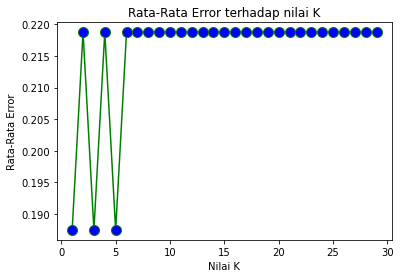

In [24]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 30), error, color='green', marker='o',
         markerfacecolor='blue',  markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
from sklearn import metrics
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test,y_pred)
print (cm)

[[25  0]
 [ 6  1]]


 Test Set: 32
 Accuracy = 81.25 %


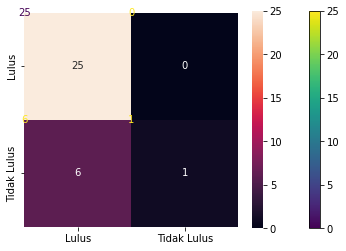

In [32]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

sns.heatmap(cm, annot=True, xticklabels=["Lulus","Tidak Lulus"],yticklabels=["Lulus","Tidak Lulus"])
print(f" Test Set: {len(x_test)}")
print(f" Accuracy = {acc*100} %")

In [33]:
#Menentukan ke akurasian
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        25
           1       1.00      0.14      0.25         7

    accuracy                           0.81        32
   macro avg       0.90      0.57      0.57        32
weighted avg       0.85      0.81      0.75        32

